## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
import os

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create output directory
output_dir = '../results/normalization/'
os.makedirs(output_dir, exist_ok=True)

print("✓ Libraries imported successfully")
print(f"✓ Output directory: {output_dir}")

✓ Libraries imported successfully
✓ Output directory: ../results/normalization/


In [2]:
# Load all datasets (from cleaned directory)
data_dir = '../data/feature-extraction-cleaned/'

print("Loading datasets...")
print("=" * 80)

df_gtzan = pd.read_csv(f'{data_dir}gtzan_features.csv')
print(f"✓ GTZAN loaded: {len(df_gtzan):,} tracks")

df_fma_small = pd.read_csv(f'{data_dir}fma_small_features_labeled.csv')
print(f"✓ FMA Small loaded: {len(df_fma_small):,} tracks")

df_fma_medium = pd.read_csv(f'{data_dir}fma_medium_features_labeled.csv')
print(f"✓ FMA Medium loaded: {len(df_fma_medium):,} tracks")

df_ludwig = pd.read_csv(f'{data_dir}ludwig_features.csv')
print(f"✓ Ludwig loaded: {len(df_ludwig):,} tracks")

df_indian = pd.read_csv(f'{data_dir}indian_features.csv')
print(f"✓ Indian Music loaded: {len(df_indian):,} tracks")

print("=" * 80)
print(f"Total tracks loaded: {len(df_gtzan) + len(df_fma_small) + len(df_fma_medium) + len(df_ludwig) + len(df_indian):,}")

Loading datasets...
✓ GTZAN loaded: 999 tracks
✓ FMA Small loaded: 7,996 tracks
✓ FMA Medium loaded: 16,986 tracks
✓ Ludwig loaded: 11,293 tracks
✓ Indian Music loaded: 500 tracks
Total tracks loaded: 37,774
✓ Ludwig loaded: 11,293 tracks
✓ Indian Music loaded: 500 tracks
Total tracks loaded: 37,774


## 2. Feature Selection

Remove non-clustering features that don't contribute to audio similarity:
- **file_path**: Metadata, not audio feature
- **duration**: Variable length, not relevant for clustering
- **sr**: Sample rate (constant 22050 Hz)
- **dataset**: Metadata identifier
- **label**: Target variable (for evaluation only)
- **subset**: Metadata identifier

In [3]:
# Define non-clustering features to remove
non_clustering_features = ['file_path', 'duration', 'sr', 'dataset', 'label', 'subset']

def select_clustering_features(df, dataset_name):
    """
    Remove non-clustering features and return only audio features
    Also save label information separately for later evaluation
    """
    # Store labels separately if they exist
    labels = None
    if 'label' in df.columns:
        labels = df[['label']].copy()
        labels.to_csv(f'{output_dir}{dataset_name}_labels.csv', index=False)
        print(f"  ✓ Saved labels: {dataset_name}_labels.csv")
    
    # Remove non-clustering features
    features_to_remove = [col for col in non_clustering_features if col in df.columns]
    df_features = df.drop(columns=features_to_remove)
    
    print(f"  ✓ Removed {len(features_to_remove)} non-clustering features: {features_to_remove}")
    print(f"  ✓ Remaining audio features: {len(df_features.columns)}")
    
    return df_features, labels

# Apply feature selection to all datasets
print("\n" + "=" * 80)
print("FEATURE SELECTION")
print("=" * 80)

print("\nGTZAN:")
gtzan_features, gtzan_labels = select_clustering_features(df_gtzan, 'gtzan')

print("\nFMA Small:")
fma_small_features, fma_small_labels = select_clustering_features(df_fma_small, 'fma_small')

print("\nFMA Medium:")
fma_medium_features, fma_medium_labels = select_clustering_features(df_fma_medium, 'fma_medium')

print("\nLudwig:")
ludwig_features, ludwig_labels = select_clustering_features(df_ludwig, 'ludwig')

print("\nIndian Music:")
indian_features, indian_labels = select_clustering_features(df_indian, 'indian')

print("\n" + "=" * 80)


FEATURE SELECTION

GTZAN:
  ✓ Saved labels: gtzan_labels.csv
  ✓ Removed 5 non-clustering features: ['file_path', 'duration', 'sr', 'dataset', 'label']
  ✓ Remaining audio features: 69

FMA Small:
  ✓ Saved labels: fma_small_labels.csv
  ✓ Removed 6 non-clustering features: ['file_path', 'duration', 'sr', 'dataset', 'label', 'subset']
  ✓ Remaining audio features: 70

FMA Medium:
  ✓ Saved labels: fma_medium_labels.csv
  ✓ Removed 6 non-clustering features: ['file_path', 'duration', 'sr', 'dataset', 'label', 'subset']
  ✓ Remaining audio features: 70

Ludwig:
  ✓ Saved labels: ludwig_labels.csv
  ✓ Removed 6 non-clustering features: ['file_path', 'duration', 'sr', 'dataset', 'label', 'subset']
  ✓ Remaining audio features: 69

Indian Music:
  ✓ Saved labels: indian_labels.csv
  ✓ Removed 6 non-clustering features: ['file_path', 'duration', 'sr', 'dataset', 'label', 'subset']
  ✓ Remaining audio features: 69



In [4]:
# Display feature summary
print("\n" + "=" * 80)
print("FEATURE SUMMARY")
print("=" * 80)

print(f"\nAudio features per dataset: {len(gtzan_features.columns)}")
print("\nFeature categories:")
print(f"  • Spectral features: 4 (spec_centroid_mean, spec_rolloff_mean, zcr_mean, rms_mean)")
print(f"  • Tempo: 1")
print(f"  • MFCC features: 40 (20 coefficients × 2 statistics)")
print(f"  • Chroma features: 24 (12 pitch classes × 2 statistics)")
print(f"\nTotal: {len(gtzan_features.columns)} audio features")

print("\nFeature list:")
print(gtzan_features.columns.tolist())


FEATURE SUMMARY

Audio features per dataset: 69

Feature categories:
  • Spectral features: 4 (spec_centroid_mean, spec_rolloff_mean, zcr_mean, rms_mean)
  • Tempo: 1
  • MFCC features: 40 (20 coefficients × 2 statistics)
  • Chroma features: 24 (12 pitch classes × 2 statistics)

Total: 69 audio features

Feature list:
['spec_centroid_mean', 'spec_rolloff_mean', 'zcr_mean', 'rms_mean', 'tempo', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std', 'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std', 'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std', 'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std', 'mfcc17_mean', 'mfcc17_std', 'mfcc18_mean', 'mfcc18_std', 'mfcc19_mean', 'mfcc19_std', 'mfcc20_mean', 'mfcc20_std', 'chroma1_mean', 'chroma1_std', 'chroma2

## 3. Data Quality Check

Check for missing values and infinite values before normalization

In [5]:
def check_data_quality(df, dataset_name):
    """
    Check for missing and infinite values
    """
    print(f"\n{dataset_name}:")
    print("-" * 40)
    
    # Check for missing values
    missing_count = df.isnull().sum().sum()
    if missing_count > 0:
        print(f"  ⚠ Missing values: {missing_count}")
        missing_features = df.columns[df.isnull().any()].tolist()
        print(f"  Features with missing values: {missing_features}")
    else:
        print(f"  ✓ No missing values")
    
    # Check for infinite values
    inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
    if inf_count > 0:
        print(f"  ⚠ Infinite values: {inf_count}")
    else:
        print(f"  ✓ No infinite values")
    
    return missing_count == 0 and inf_count == 0

# Check all datasets
print("=" * 80)
print("DATA QUALITY CHECK")
print("=" * 80)

quality_checks = {
    'GTZAN': check_data_quality(gtzan_features, 'GTZAN'),
    'FMA_Small': check_data_quality(fma_small_features, 'FMA Small'),
    'FMA_Medium': check_data_quality(fma_medium_features, 'FMA Medium'),
    'Ludwig': check_data_quality(ludwig_features, 'Ludwig'),
    'Indian': check_data_quality(indian_features, 'Indian Music')
}

print("\n" + "=" * 80)
if all(quality_checks.values()):
    print("✓ All datasets passed quality check")
else:
    print("⚠ Some datasets have data quality issues")

DATA QUALITY CHECK

GTZAN:
----------------------------------------
  ✓ No missing values
  ✓ No infinite values

FMA Small:
----------------------------------------
  ✓ No missing values
  ✓ No infinite values

FMA Medium:
----------------------------------------
  ✓ No missing values
  ✓ No infinite values

Ludwig:
----------------------------------------
  ✓ No missing values
  ✓ No infinite values

Indian Music:
----------------------------------------
  ✓ No missing values
  ✓ No infinite values

✓ All datasets passed quality check


## 4. Handle Missing Values (if any)

Fill missing values with 0 or median

In [6]:
def handle_missing_values(df, strategy='zero'):
    """
    Handle missing values
    strategy: 'zero' or 'median'
    """
    if df.isnull().sum().sum() == 0:
        return df
    
    if strategy == 'zero':
        return df.fillna(0)
    elif strategy == 'median':
        return df.fillna(df.median())
    
    return df

# Handle missing values (if any)
gtzan_features = handle_missing_values(gtzan_features, strategy='zero')
fma_small_features = handle_missing_values(fma_small_features, strategy='zero')
fma_medium_features = handle_missing_values(fma_medium_features, strategy='zero')
ludwig_features = handle_missing_values(ludwig_features, strategy='zero')
indian_features = handle_missing_values(indian_features, strategy='zero')

print("✓ Missing values handled (filled with 0)")

✓ Missing values handled (filled with 0)


## 5. StandardScaler Normalization

Apply StandardScaler to normalize features:
- **Zero mean**: Centers data around 0
- **Unit variance**: Scales to standard deviation of 1
- **Formula**: $z = \frac{x - \mu}{\sigma}$

This ensures all features contribute equally to clustering algorithms.

In [7]:
def normalize_features(df, dataset_name):
    """
    Apply StandardScaler normalization
    Returns normalized dataframe and fitted scaler
    """
    print(f"\n{dataset_name}:")
    print("-" * 40)
    
    # Initialize scaler
    scaler = StandardScaler()
    
    # Fit and transform
    normalized_data = scaler.fit_transform(df)
    
    # Create dataframe with same columns
    df_normalized = pd.DataFrame(normalized_data, columns=df.columns, index=df.index)
    
    # Verify normalization
    mean_val = df_normalized.mean().mean()
    std_val = df_normalized.std().mean()
    
    print(f"  Original - Mean: {df.mean().mean():.4f}, Std: {df.std().mean():.4f}")
    print(f"  Normalized - Mean: {mean_val:.4f}, Std: {std_val:.4f}")
    print(f"  ✓ Shape: {df_normalized.shape}")
    
    return df_normalized, scaler

# Apply normalization to all datasets
print("=" * 80)
print("STANDARDSCALER NORMALIZATION")
print("=" * 80)

gtzan_normalized, gtzan_scaler = normalize_features(gtzan_features, 'GTZAN')
fma_small_normalized, fma_small_scaler = normalize_features(fma_small_features, 'FMA Small')
fma_medium_normalized, fma_medium_scaler = normalize_features(fma_medium_features, 'FMA Medium')
ludwig_normalized, ludwig_scaler = normalize_features(ludwig_features, 'Ludwig')
indian_normalized, indian_scaler = normalize_features(indian_features, 'Indian Music')

print("\n" + "=" * 80)
print("✓ All datasets normalized successfully")

STANDARDSCALER NORMALIZATION

GTZAN:
----------------------------------------
  Original - Mean: 103.6147, Std: 38.7540
  Normalized - Mean: -0.0000, Std: 1.0005
  ✓ Shape: (999, 69)

FMA Small:
----------------------------------------
  Original - Mean: 1290.0627, Std: 657.0965
  Normalized - Mean: -0.0000, Std: 1.0001
  ✓ Shape: (7996, 70)

FMA Medium:
----------------------------------------
  Original - Mean: 1154.9103, Std: 676.7090
  Normalized - Mean: -0.0000, Std: 1.0000
  ✓ Shape: (16986, 70)

Ludwig:
----------------------------------------
  Original - Mean: 105.6553, Std: 34.4225
  Normalized - Mean: -0.0000, Std: 1.0000
  ✓ Shape: (11293, 69)

Indian Music:
----------------------------------------
  Original - Mean: 99.0547, Std: 26.6002
  Normalized - Mean: -0.0000, Std: 1.0010
  ✓ Shape: (500, 69)

✓ All datasets normalized successfully


## 6. Visualization: Before vs After Normalization

Compare feature distributions before and after normalization


Generating normalization comparison plots...



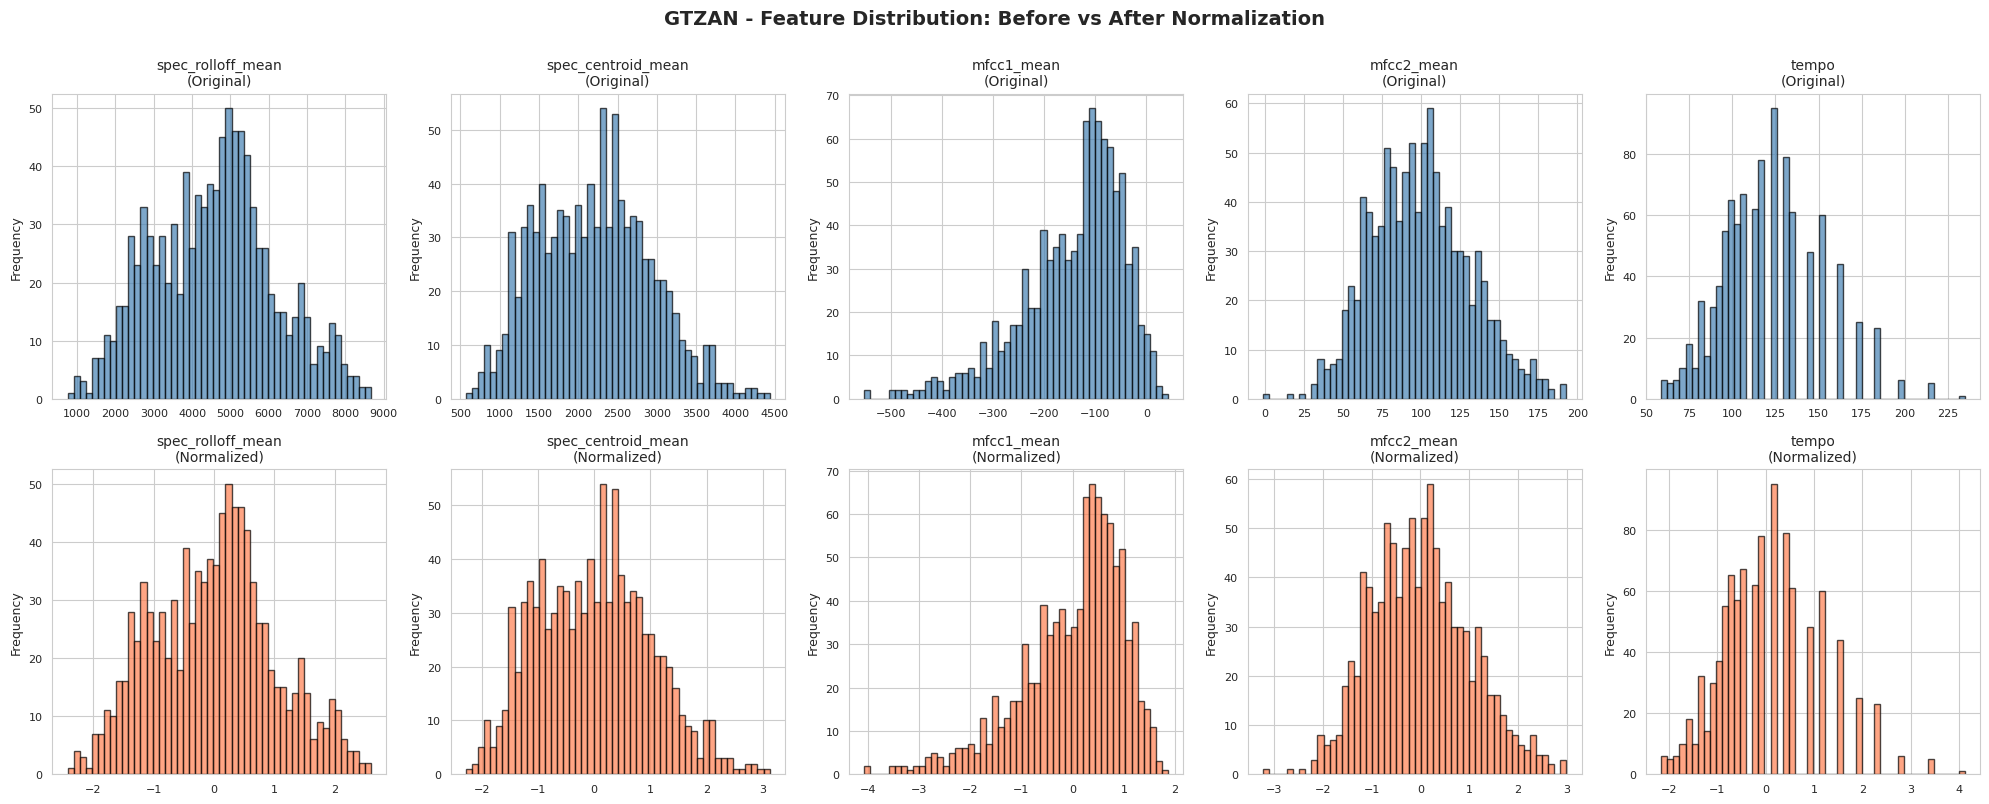

✓ Saved: gtzan_normalization_comparison.png


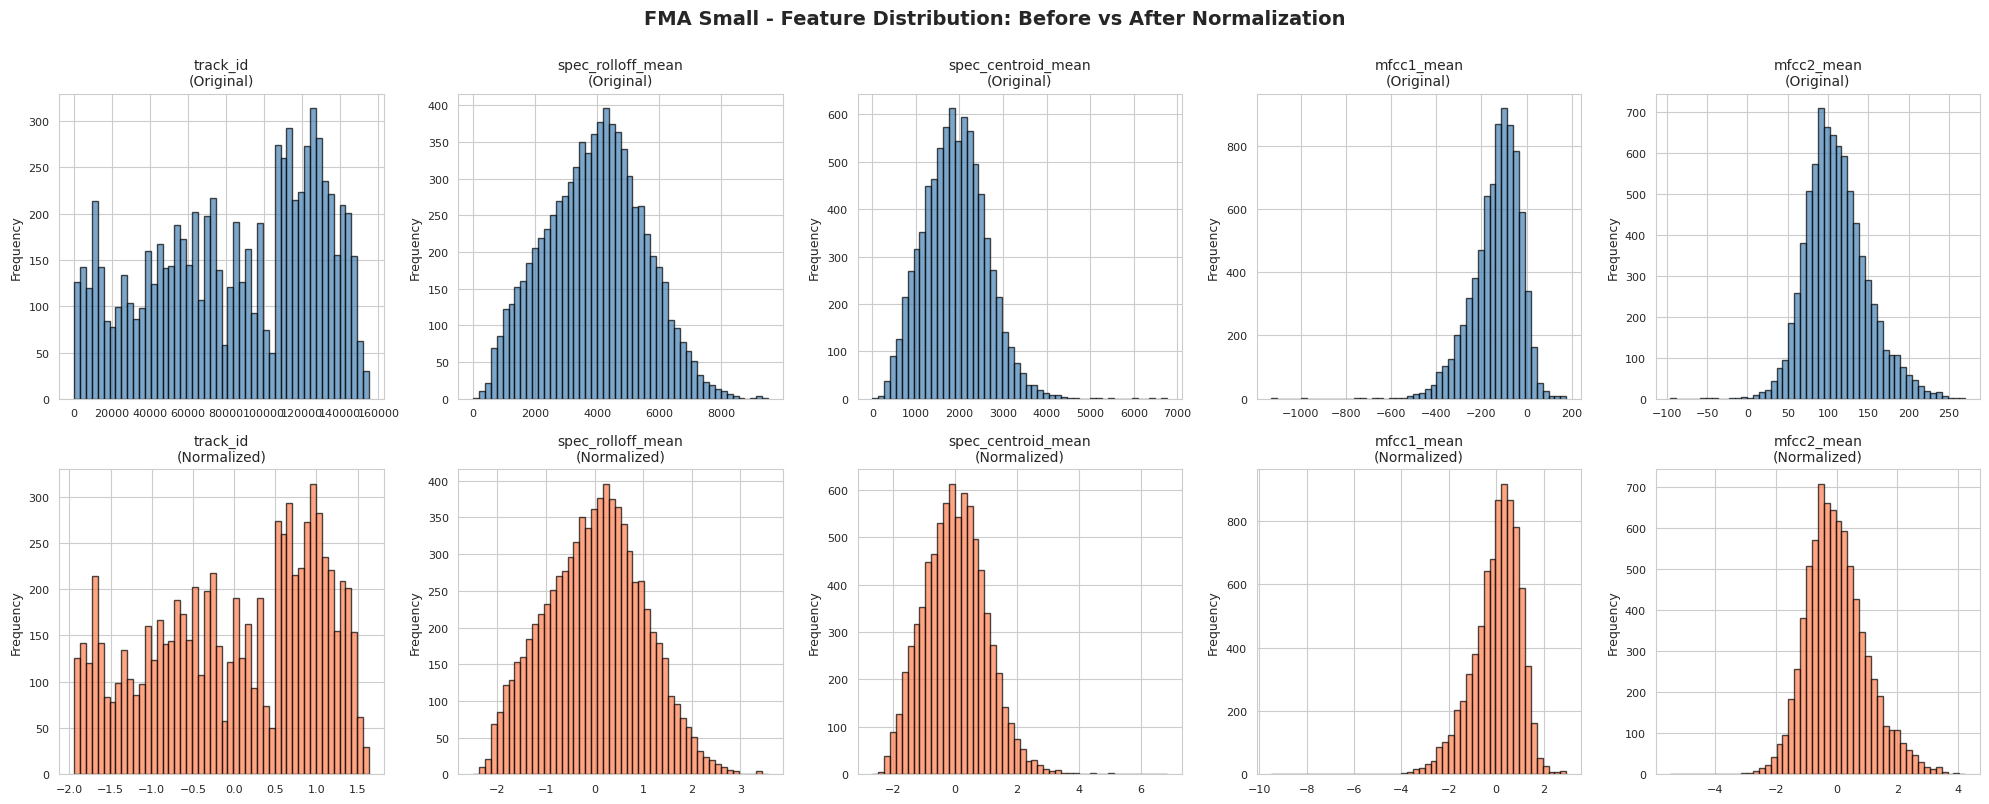

✓ Saved: fma_small_normalization_comparison.png


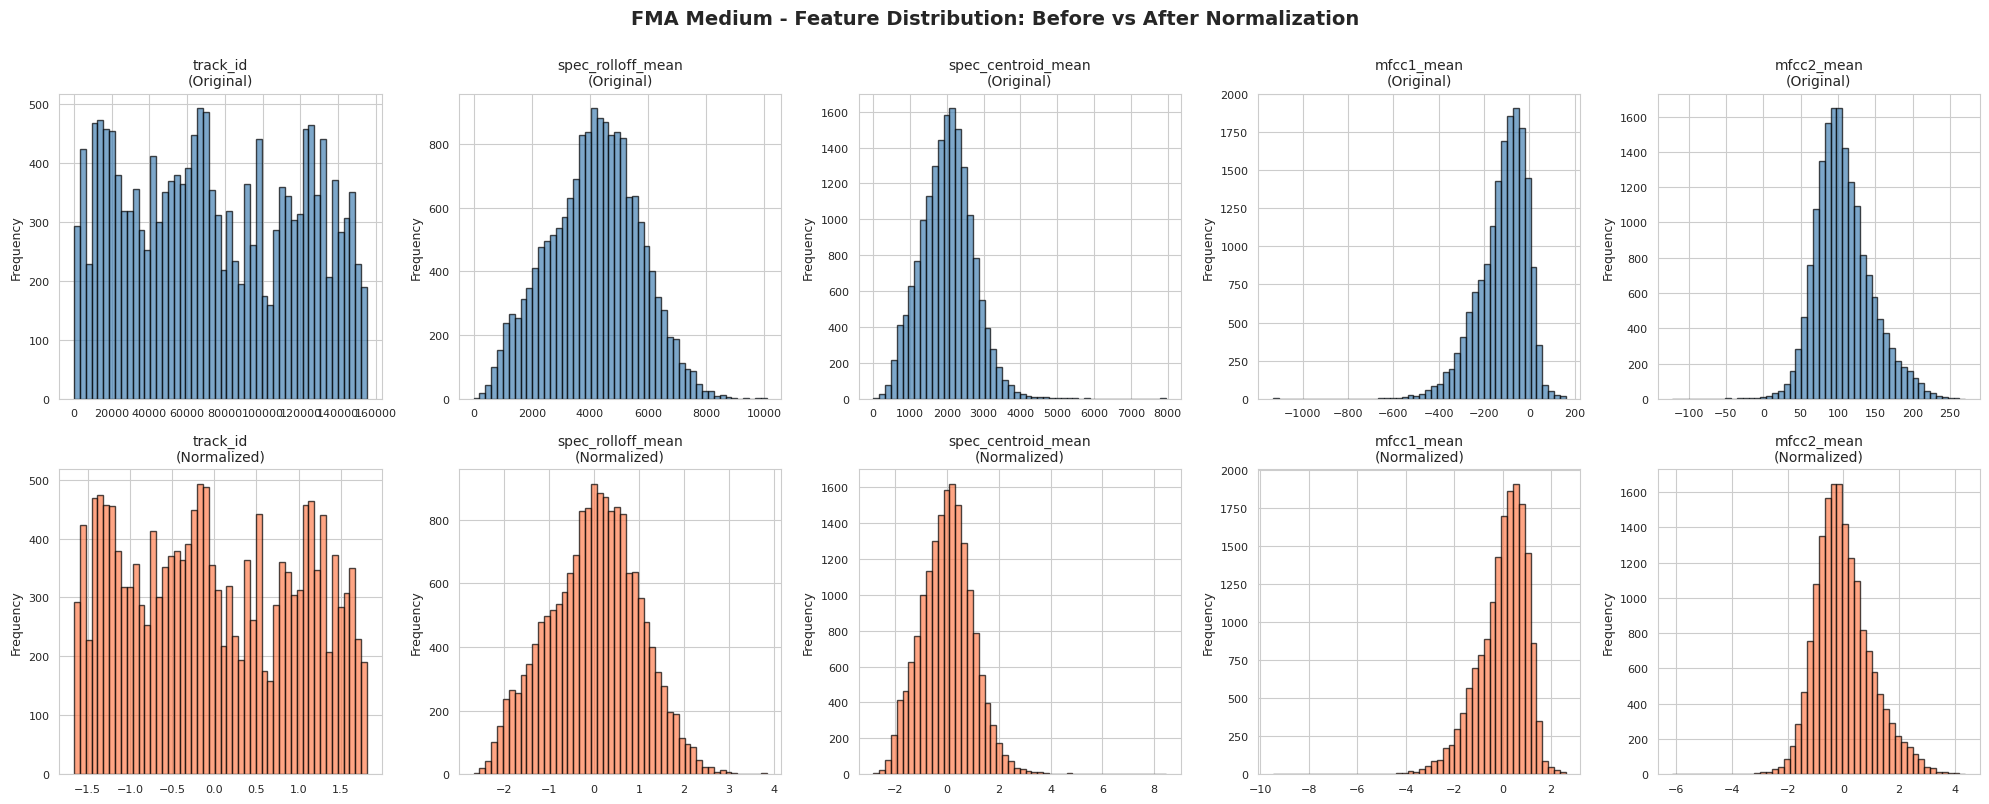

✓ Saved: fma_medium_normalization_comparison.png


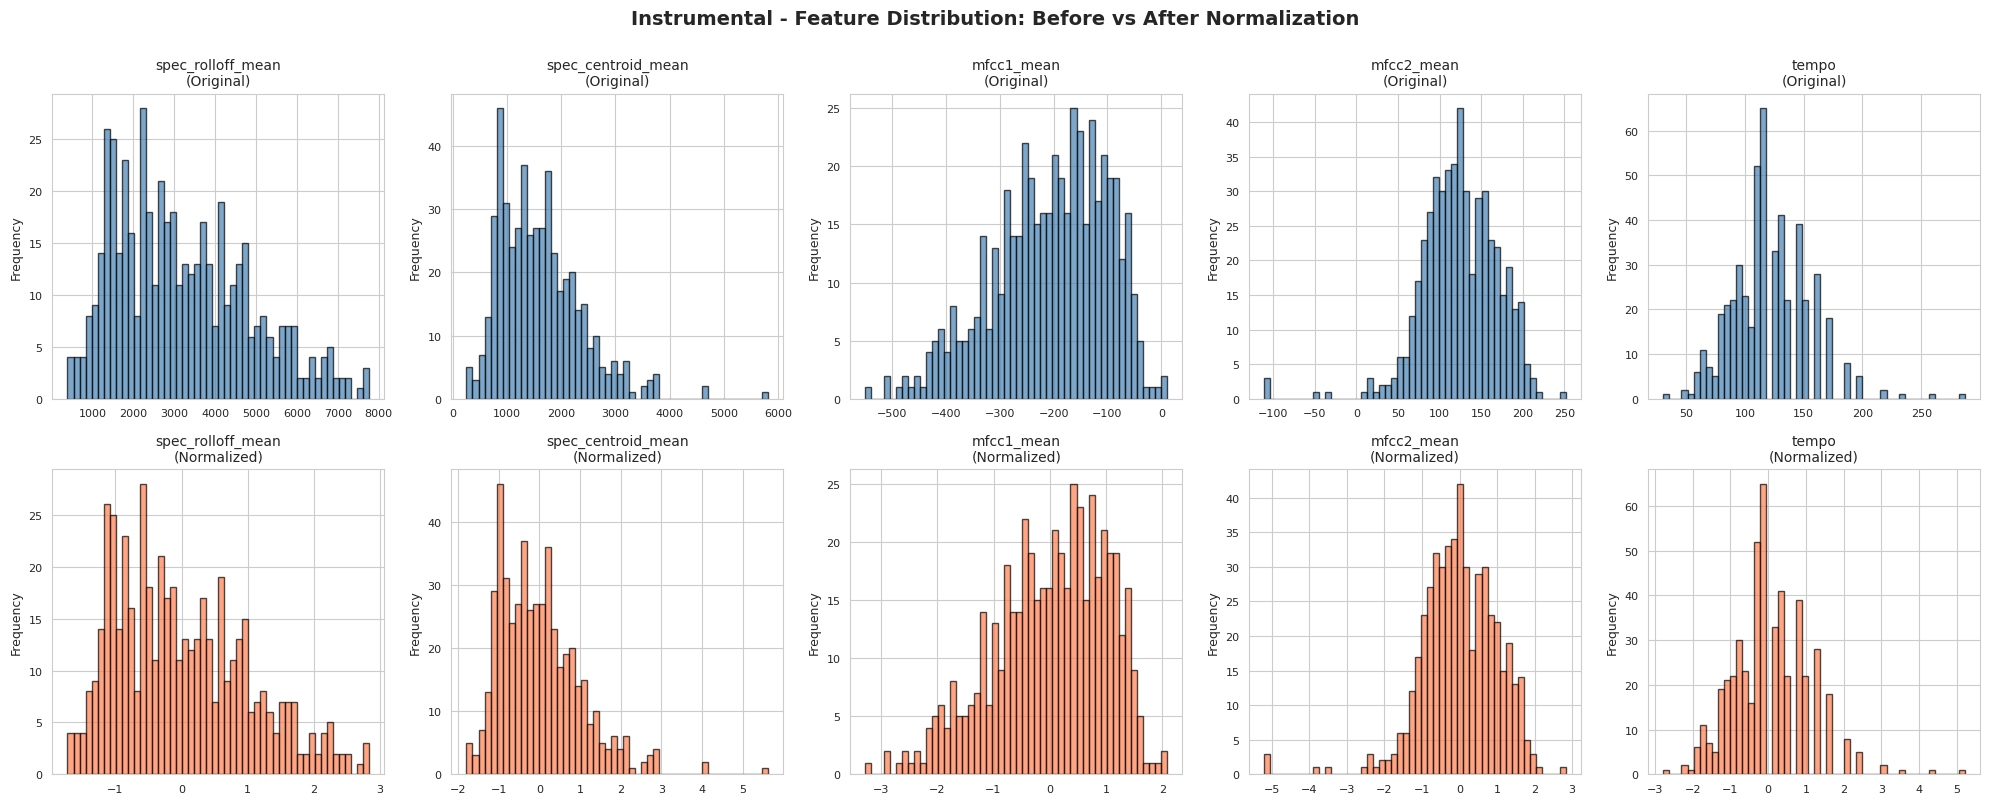

✓ Saved: instrumental_normalization_comparison.png


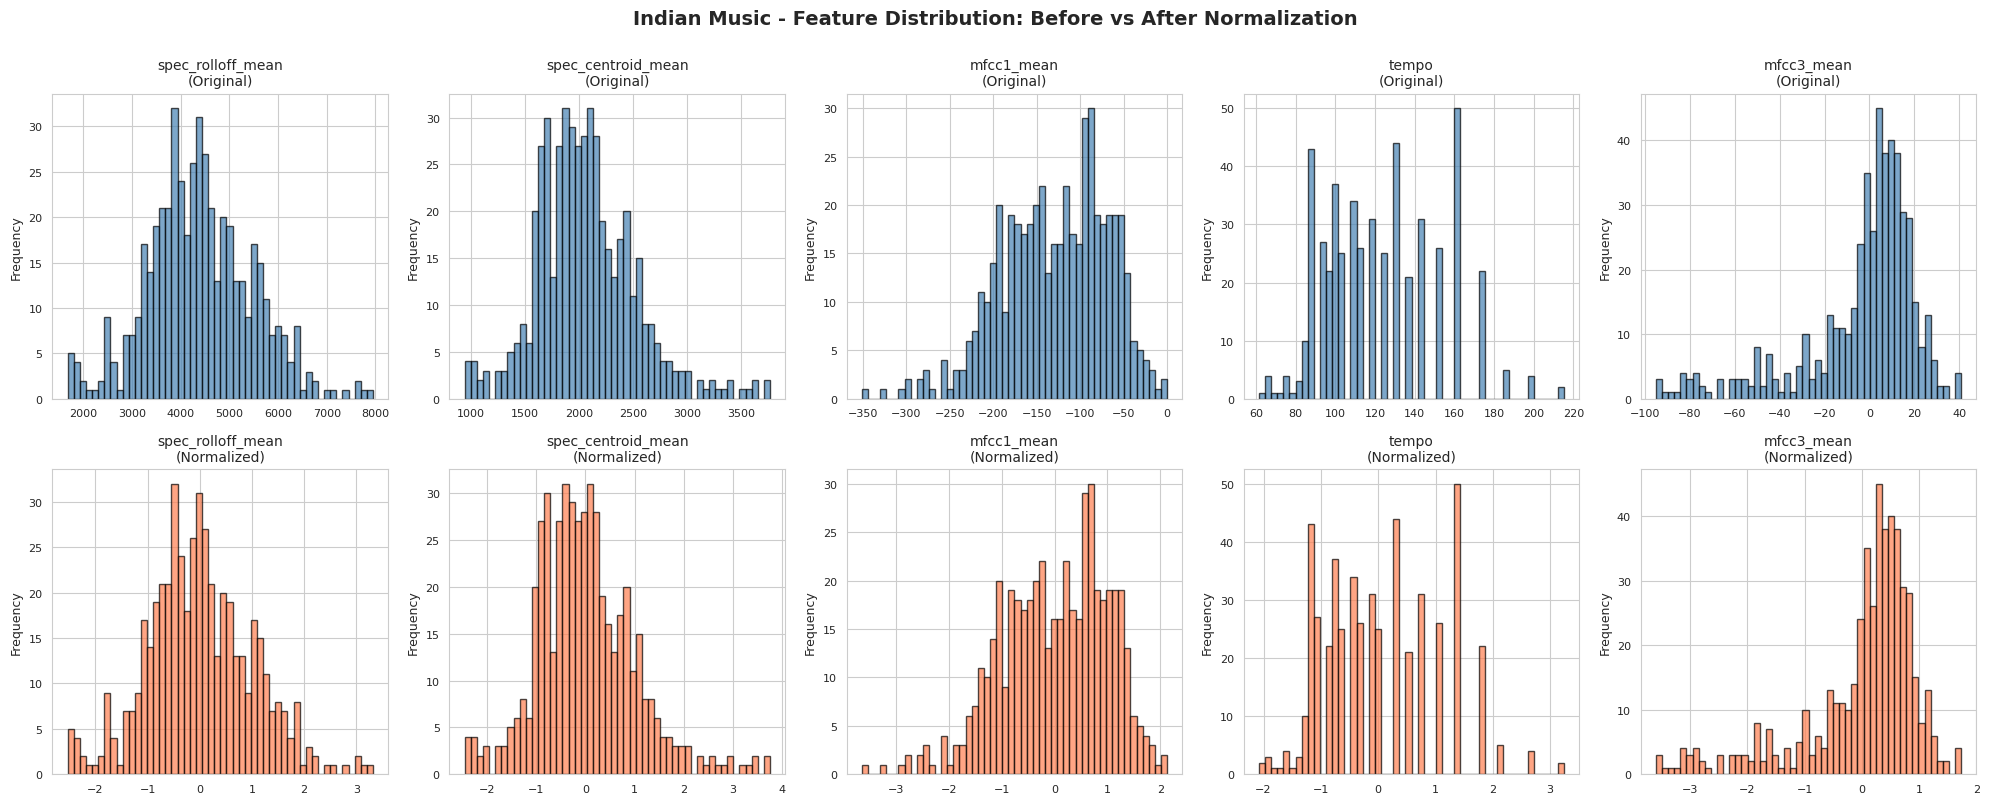

✓ Saved: indian_music_normalization_comparison.png


In [ ]:
def plot_normalization_comparison(df_original, df_normalized, dataset_name, features_to_plot=5):
    """
    Plot before and after normalization comparison
    """
    # Select features with highest variance
    feature_vars = df_original.var().sort_values(ascending=False)
    selected_features = feature_vars.head(features_to_plot).index.tolist()
    
    fig, axes = plt.subplots(2, features_to_plot, figsize=(20, 8))
    
    for i, feature in enumerate(selected_features):
        # Before normalization
        axes[0, i].hist(df_original[feature].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[0, i].set_title(f'{feature}\n(Original)', fontsize=10)
        axes[0, i].set_ylabel('Frequency', fontsize=9)
        axes[0, i].tick_params(axis='both', labelsize=8)
        
        # After normalization
        axes[1, i].hist(df_normalized[feature].dropna(), bins=50, color='coral', edgecolor='black', alpha=0.7)
        axes[1, i].set_title(f'{feature}\n(Normalized)', fontsize=10)
        axes[1, i].set_ylabel('Frequency', fontsize=9)
        axes[1, i].tick_params(axis='both', labelsize=8)
    
    plt.suptitle(f'{dataset_name} - Feature Distribution: Before vs After Normalization', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig(f'{output_dir}{dataset_name.lower().replace(" ", "_")}_normalization_comparison.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: {dataset_name.lower().replace(' ', '_')}_normalization_comparison.png")

# Create comparison plots for each dataset
print("\nGenerating normalization comparison plots...\n")

plot_normalization_comparison(gtzan_features, gtzan_normalized, 'GTZAN')
plot_normalization_comparison(fma_small_features, fma_small_normalized, 'FMA Small')
plot_normalization_comparison(fma_medium_features, fma_medium_normalized, 'FMA Medium')
plot_normalization_comparison(ludwig_features, ludwig_normalized, 'Ludwig')
plot_normalization_comparison(indian_features, indian_normalized, 'Indian Music')

## 7. Statistical Summary

Generate summary statistics for normalized data

In [ ]:
def generate_normalization_summary(df_normalized, dataset_name):
    """
    Generate statistical summary of normalized data
    """
    summary = pd.DataFrame({
        'Feature': df_normalized.columns,
        'Mean': df_normalized.mean().values,
        'Std': df_normalized.std().values,
        'Min': df_normalized.min().values,
        'Max': df_normalized.max().values,
        'Q1': df_normalized.quantile(0.25).values,
        'Median': df_normalized.median().values,
        'Q3': df_normalized.quantile(0.75).values
    })
    
    # Save summary
    summary.to_csv(f'{output_dir}{dataset_name}_normalized_summary.csv', index=False)
    print(f"✓ Saved: {dataset_name}_normalized_summary.csv")
    
    return summary

# Generate summaries
print("\n" + "=" * 80)
print("GENERATING NORMALIZATION SUMMARIES")
print("=" * 80 + "\n")

gtzan_summary = generate_normalization_summary(gtzan_normalized, 'gtzan')
fma_small_summary = generate_normalization_summary(fma_small_normalized, 'fma_small')
fma_medium_summary = generate_normalization_summary(fma_medium_normalized, 'fma_medium')
ludwig_summary = generate_normalization_summary(ludwig_normalized, 'ludwig')
indian_summary = generate_normalization_summary(indian_normalized, 'indian')

print("\n✓ All summaries generated")


GENERATING NORMALIZATION SUMMARIES

✓ Saved: gtzan_normalized_summary.csv
✓ Saved: fma_small_normalized_summary.csv
✓ Saved: fma_medium_normalized_summary.csv
✓ Saved: instrumental_normalized_summary.csv
✓ Saved: indian_normalized_summary.csv

✓ All summaries generated


In [30]:
# Display sample statistics
print("\n" + "=" * 80)
print("SAMPLE STATISTICS (First 5 features of Indian Music)")
print("=" * 80 + "\n")
print(indian_summary.head())


SAMPLE STATISTICS (First 5 features of Indian Music)

              Feature          Mean       Std       Min       Max        Q1  \
0  spec_centroid_mean -2.131628e-16  1.001002 -2.452704  3.748456 -0.666085   
1   spec_rolloff_mean -4.973799e-16  1.001002 -2.531834  3.317850 -0.654603   
2            zcr_mean -1.492140e-16  1.001002 -1.761680  3.984376 -0.708317   
3            rms_mean -5.471179e-16  1.001002 -1.939606  3.375072 -0.867170   
4               tempo  3.108624e-16  1.001002 -2.081662  3.244441 -0.770621   

     Median        Q3  
0 -0.088078  0.595157  
1 -0.046439  0.626631  
2 -0.208275  0.511389  
3 -0.043677  0.839940  
4 -0.144897  0.758926  


## 8. Save Normalized Datasets

Save all normalized datasets to CSV files for clustering

In [8]:
# Save all normalized datasets
print("\n" + "=" * 80)
print("SAVING NORMALIZED DATASETS")
print("=" * 80 + "\n")

datasets_to_save = [
    (gtzan_normalized, 'gtzan'),
    (fma_small_normalized, 'fma_small'),
    (fma_medium_normalized, 'fma_medium'),
    (ludwig_normalized, 'ludwig'),
    (indian_normalized, 'indian')
]

for df, name in datasets_to_save:
    filename = f'{output_dir}{name}_normalized.csv'
    df.to_csv(filename, index=False)
    file_size = os.path.getsize(filename) / (1024 * 1024)  # MB
    print(f"✓ Saved: {name}_normalized.csv ({len(df):,} tracks, {file_size:.2f} MB)")

print("\n" + "=" * 80)
print("✓ All normalized datasets saved successfully")


SAVING NORMALIZED DATASETS

✓ Saved: gtzan_normalized.csv (999 tracks, 1.29 MB)
✓ Saved: fma_small_normalized.csv (7,996 tracks, 10.49 MB)
✓ Saved: fma_small_normalized.csv (7,996 tracks, 10.49 MB)
✓ Saved: fma_medium_normalized.csv (16,986 tracks, 22.30 MB)
✓ Saved: fma_medium_normalized.csv (16,986 tracks, 22.30 MB)
✓ Saved: ludwig_normalized.csv (11,293 tracks, 14.61 MB)
✓ Saved: indian_normalized.csv (500 tracks, 0.65 MB)

✓ All normalized datasets saved successfully
✓ Saved: ludwig_normalized.csv (11,293 tracks, 14.61 MB)
✓ Saved: indian_normalized.csv (500 tracks, 0.65 MB)

✓ All normalized datasets saved successfully


## 9. Final Summary Report

In [9]:
# Generate final summary report
report = []
report.append("=" * 80)
report.append("STEP 2: FEATURE SELECTION & NORMALIZATION - SUMMARY REPORT")
report.append("=" * 80)
report.append("")

report.append("1. FEATURE SELECTION")
report.append("-" * 80)
report.append(f"Features removed: {len(non_clustering_features)}")
report.append(f"  • {', '.join(non_clustering_features)}")
report.append(f"Audio features retained: {len(gtzan_normalized.columns)}")
report.append("  • Spectral: 4 features")
report.append("  • Tempo: 1 feature")
report.append("  • MFCC: 40 features")
report.append("  • Chroma: 24 features")
report.append("")

report.append("2. NORMALIZATION METHOD")
report.append("-" * 80)
report.append("StandardScaler (sklearn)")
report.append("  • Formula: z = (x - μ) / σ")
report.append("  • Result: Zero mean, unit variance")
report.append("  • Purpose: Equal feature contribution to clustering")
report.append("")

report.append("3. DATASETS PROCESSED")
report.append("-" * 80)
report.append(f"GTZAN:        {len(gtzan_normalized):,} tracks × {len(gtzan_normalized.columns)} features")
report.append(f"FMA Small:    {len(fma_small_normalized):,} tracks × {len(fma_small_normalized.columns)} features")
report.append(f"FMA Medium:   {len(fma_medium_normalized):,} tracks × {len(fma_medium_normalized.columns)} features")
report.append(f"Ludwig:       {len(ludwig_normalized):,} tracks × {len(ludwig_normalized.columns)} features")
report.append(f"Indian Music: {len(indian_normalized):,} tracks × {len(indian_normalized.columns)} features")
total_tracks = len(gtzan_normalized) + len(fma_small_normalized) + len(fma_medium_normalized) + len(ludwig_normalized) + len(indian_normalized)
report.append(f"\nTotal: {total_tracks:,} tracks processed")
report.append("")

report.append("4. OUTPUT FILES")
report.append("-" * 80)
report.append(f"Location: {output_dir}")
report.append("\nNormalized datasets (CSV):")
for _, name in datasets_to_save:
    report.append(f"  • {name}_normalized.csv")
report.append("\nLabel files (CSV):")
report.append("  • gtzan_labels.csv")
report.append("  • fma_small_labels.csv")
report.append("  • fma_medium_labels.csv")
report.append("  • ludwig_labels.csv")
report.append("  • indian_labels.csv")
report.append("\nVisualization images (PNG):")
report.append("  • gtzan_normalization_comparison.png")
report.append("  • fma_small_normalization_comparison.png")
report.append("  • fma_medium_normalization_comparison.png")
report.append("  • ludwig_normalization_comparison.png")
report.append("  • indian_music_normalization_comparison.png")
report.append("\nStatistical summaries (CSV):")
for _, name in datasets_to_save:
    report.append(f"  • {name}_normalized_summary.csv")
report.append("")

report.append("5. QUALITY VERIFICATION")
report.append("-" * 80)
report.append("✓ No missing values")
report.append("✓ No infinite values")
report.append("✓ All features normalized (mean ≈ 0, std ≈ 1)")
report.append("✓ Feature count consistent across datasets")
report.append("✓ Labels preserved separately for evaluation")
report.append("")

report.append("6. NEXT STEPS")
report.append("-" * 80)
report.append("→ Step 3: Outlier Detection & Removal")
report.append("→ Step 4: Dimensionality Reduction (PCA)")
report.append("→ Step 5: Clustering (K-Means, K-Medoids, GMM, Spectral)")
report.append("→ Step 6: Evaluation (Silhouette, Davies-Bouldin, etc.)")
report.append("")

report.append("=" * 80)
report.append("NORMALIZATION COMPLETED SUCCESSFULLY ✓")
report.append("=" * 80)

# Print and save report
report_text = "\n".join(report)
print("\n" + report_text)

with open(f'{output_dir}normalization_summary_report.txt', 'w') as f:
    f.write(report_text)

print(f"\n✓ Summary report saved: normalization_summary_report.txt")


STEP 2: FEATURE SELECTION & NORMALIZATION - SUMMARY REPORT

1. FEATURE SELECTION
--------------------------------------------------------------------------------
Features removed: 6
  • file_path, duration, sr, dataset, label, subset
Audio features retained: 69
  • Spectral: 4 features
  • Tempo: 1 feature
  • MFCC: 40 features
  • Chroma: 24 features

2. NORMALIZATION METHOD
--------------------------------------------------------------------------------
StandardScaler (sklearn)
  • Formula: z = (x - μ) / σ
  • Result: Zero mean, unit variance
  • Purpose: Equal feature contribution to clustering

3. DATASETS PROCESSED
--------------------------------------------------------------------------------
GTZAN:        999 tracks × 69 features
FMA Small:    7,996 tracks × 70 features
FMA Medium:   16,986 tracks × 70 features
Ludwig:       11,293 tracks × 69 features
Indian Music: 500 tracks × 69 features

Total: 37,774 tracks processed

4. OUTPUT FILES
--------------------------------------

In [10]:
# List all output files
print("\n" + "=" * 80)
print("OUTPUT FILES CREATED")
print("=" * 80 + "\n")

output_files = sorted(os.listdir(output_dir))
for i, file in enumerate(output_files, 1):
    file_path = os.path.join(output_dir, file)
    file_size = os.path.getsize(file_path) / 1024  # KB
    print(f"{i:2d}. {file:50s} ({file_size:8.2f} KB)")

print(f"\nTotal files: {len(output_files)}")


OUTPUT FILES CREATED

 1. fma_medium_labels.csv                              (  142.16 KB)
 2. fma_medium_normalization_comparison.png            (  418.33 KB)
 3. fma_medium_normalized.csv                          (22837.79 KB)
 4. fma_medium_normalized_summary.csv                  (   10.36 KB)
 5. fma_small_labels.csv                               (   71.25 KB)
 6. fma_small_normalization_comparison.png             (  392.00 KB)
 7. fma_small_normalized.csv                           (10744.83 KB)
 8. fma_small_normalized_summary.csv                   (   10.28 KB)
 9. gtzan_labels.csv                                   (    6.25 KB)
10. gtzan_normalization_comparison.png                 (  335.42 KB)
11. gtzan_normalized.csv                               ( 1322.53 KB)
12. gtzan_normalized_summary.csv                       (   10.11 KB)
13. indian_labels.csv                                  (    4.30 KB)
14. indian_music_normalization_comparison.png          (  315.16 KB)
15. indian_